### CIFAR-10 and CIFAR-100 Image Classification Datasets

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#plots
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

#tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras import metrics
from keras import utils

#!pip install visualkeras
import visualkeras
from tensorflow.keras.utils import plot_model

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

### Check Runtime Resources





In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Apr  2 20:08:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


### CIFAR-10: Import and pre-process data

In [4]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

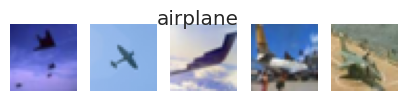

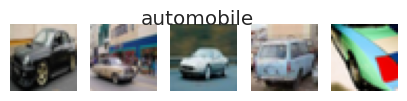

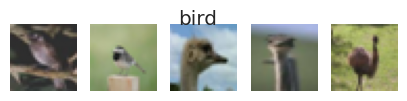

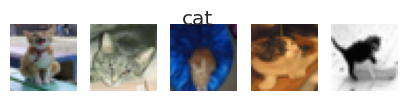

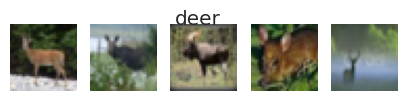

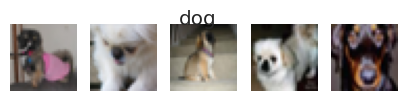

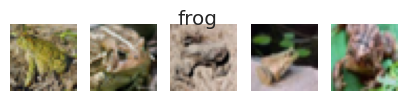

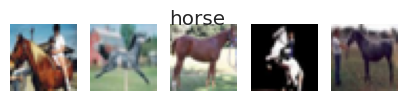

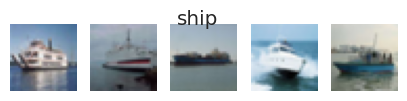

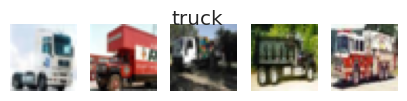

In [7]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

#### Placeholder: Model Building Function
Create a placeholder function for building a neural net

In [8]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [9]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[256, 128])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())

Epoch 1/10
704/704 [==============================] - 8s 4ms/step - loss: 1.8981 - accuracy: 0.3193 - val_loss: 1.7925 - val_accuracy: 0.3578
Epoch 2/10
704/704 [==============================] - 2s 3ms/step - loss: 1.6986 - accuracy: 0.3908 - val_loss: 1.6951 - val_accuracy: 0.3942
Epoch 3/10
704/704 [==============================] - 2s 3ms/step - loss: 1.6099 - accuracy: 0.4234 - val_loss: 1.6373 - val_accuracy: 0.4210
Epoch 4/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5636 - accuracy: 0.4417 - val_loss: 1.5902 - val_accuracy: 0.4356
Epoch 5/10
704/704 [==============================] - 2s 3ms/step - loss: 1.5172 - accuracy: 0.4580 - val_loss: 1.5631 - val_accuracy: 0.4482
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 1.4844 - accuracy: 0.4702 - val_loss: 1.5363 - val_accuracy: 0.4648
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 1.4601 - accuracy: 0.4795 - val_loss: 1.5342 - val_accuracy: 0.4620
Epoch 

,loss,accuracy,val_loss,val_accuracy
0,1.898086,0.319333,1.792514,0.3578
1,1.698615,0.390844,1.695067,0.3942
2,1.609884,0.423444,1.637333,0.4210
3,1.563639,0.441689,1.590194,0.4356
4,1.517167,0.457956,1.563078,0.4482
5,1.484353,0.470244,1.536290,0.4648
6,1.460080,0.479467,1.534203,0.4620
7,1.431839,0.488311,1.501055,0.4710
8,1.417203,0.495022,1.547175,0.4616
9,1.395377,0.502511,1.471245,0.4926


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None


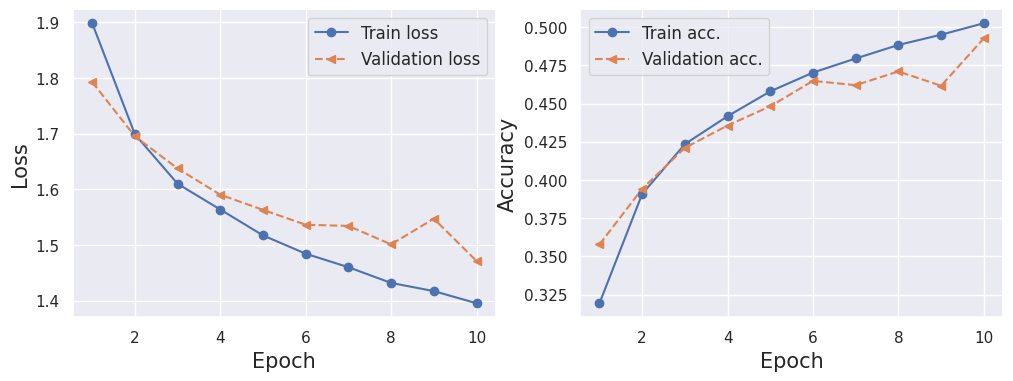

In [11]:
hist = history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [12]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4455 - accuracy: 0.4888

Test Acc. 48.88%


### Build CNN Model

In [13]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
    
  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation))
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [14]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/10
704/704 [==============================] - 10s 5ms/step - loss: 1.5648 - accuracy: 0.4313 - val_loss: 1.3375 - val_accuracy: 0.5254
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 1.2395 - accuracy: 0.5581 - val_loss: 1.2185 - val_accuracy: 0.5740
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 1.1035 - accuracy: 0.6106 - val_loss: 1.0799 - val_accuracy: 0.6244
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0037 - accuracy: 0.6502 - val_loss: 1.0099 - val_accuracy: 0.6470
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 0.9070 - accuracy: 0.6825 - val_loss: 0.9506 - val_accuracy: 0.6702
Epoch 6/10
704/704 [==============================] - 3s 4ms/step - loss: 0.8420 - accuracy: 0.7027 - val_loss: 1.0414 - val_accuracy: 0.6468
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.7869 - accuracy: 0.7244 - val_loss: 0.9325 - val_accuracy: 0.6820
Epoch

,loss,accuracy,val_loss,val_accuracy
0,1.564804,0.431289,1.337515,0.5254
1,1.239506,0.558089,1.218477,0.5740
2,1.103546,0.610622,1.079908,0.6244
3,1.003716,0.650244,1.009930,0.6470
4,0.906970,0.682489,0.950625,0.6702
5,0.841953,0.702733,1.041382,0.6468
6,0.786906,0.724400,0.932501,0.6820
7,0.720107,0.749111,0.881420,0.6978
8,0.662655,0.766689,0.895438,0.7042
9,0.610374,0.785533,0.898800,0.7070


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

### Plot CNN Model Training & Validation Accuracy

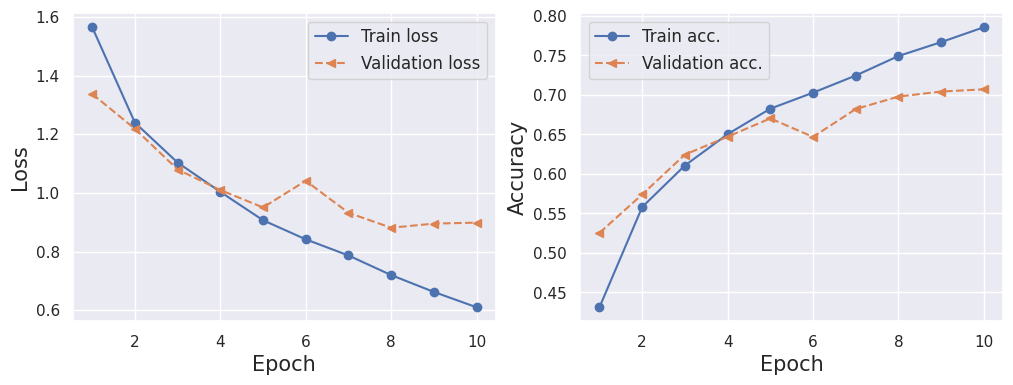

In [15]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [16]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.8890 - accuracy: 0.7034

Test Acc. 70.34%


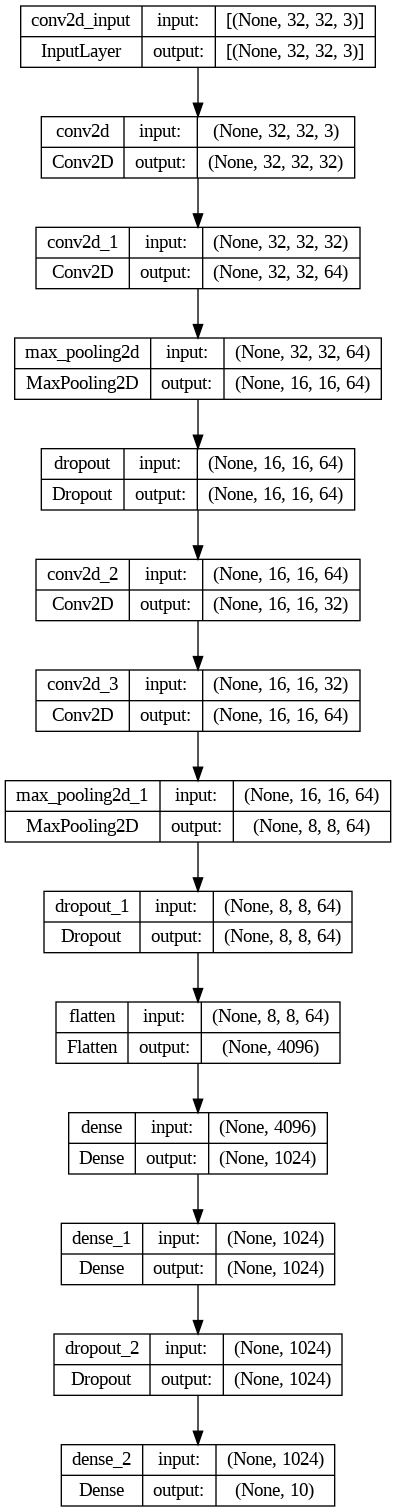

In [32]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

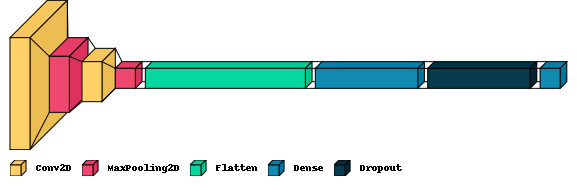

In [25]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model #2

In [27]:
def build_cnn_model_2(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  #model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Conv2D(filters = 32, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))    
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  #model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [31]:
model = build_cnn_model_2(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

Epoch 1/20
704/704 [==============================] - 12s 13ms/step - loss: 1.7113 - accuracy: 0.3623 - val_loss: 1.4339 - val_accuracy: 0.4832
Epoch 2/20
704/704 [==============================] - 9s 13ms/step - loss: 1.3259 - accuracy: 0.5218 - val_loss: 1.1918 - val_accuracy: 0.5712
Epoch 3/20
704/704 [==============================] - 9s 13ms/step - loss: 1.1523 - accuracy: 0.5923 - val_loss: 1.0463 - val_accuracy: 0.6280
Epoch 4/20
704/704 [==============================] - 9s 13ms/step - loss: 1.0287 - accuracy: 0.6375 - val_loss: 0.9523 - val_accuracy: 0.6716
Epoch 5/20
704/704 [==============================] - 9s 13ms/step - loss: 0.9405 - accuracy: 0.6692 - val_loss: 0.8740 - val_accuracy: 0.6978
Epoch 6/20
704/704 [==============================] - 9s 13ms/step - loss: 0.8739 - accuracy: 0.6929 - val_loss: 0.8663 - val_accuracy: 0.6916
Epoch 7/20
704/704 [==============================] - 9s 12ms/step - loss: 0.8216 - accuracy: 0.7094 - val_loss: 0.8326 - val_accuracy: 0.715

,loss,accuracy,val_loss,val_accuracy
0,1.711342,0.362333,1.433886,0.4832
1,1.325890,0.521800,1.191766,0.5712
2,1.152311,0.592333,1.046320,0.6280
3,1.028679,0.637467,0.952323,0.6716
4,0.940486,0.669156,0.873981,0.6978
5,0.873883,0.692911,0.866308,0.6916
6,0.821633,0.709422,0.832636,0.7154
7,0.772059,0.728489,0.819316,0.7148
8,0.730230,0.742711,0.849975,0.7148
9,0.686083,0.758200,0.788570,0.7302


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                        

### Plot CNN Model 2 Training & Validation Accuracy

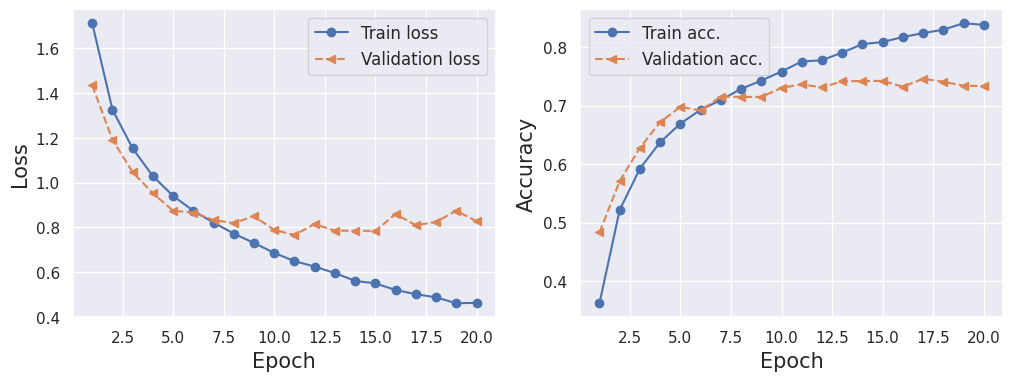

In [33]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [34]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.8617 - accuracy: 0.7342

Test Acc. 73.42%


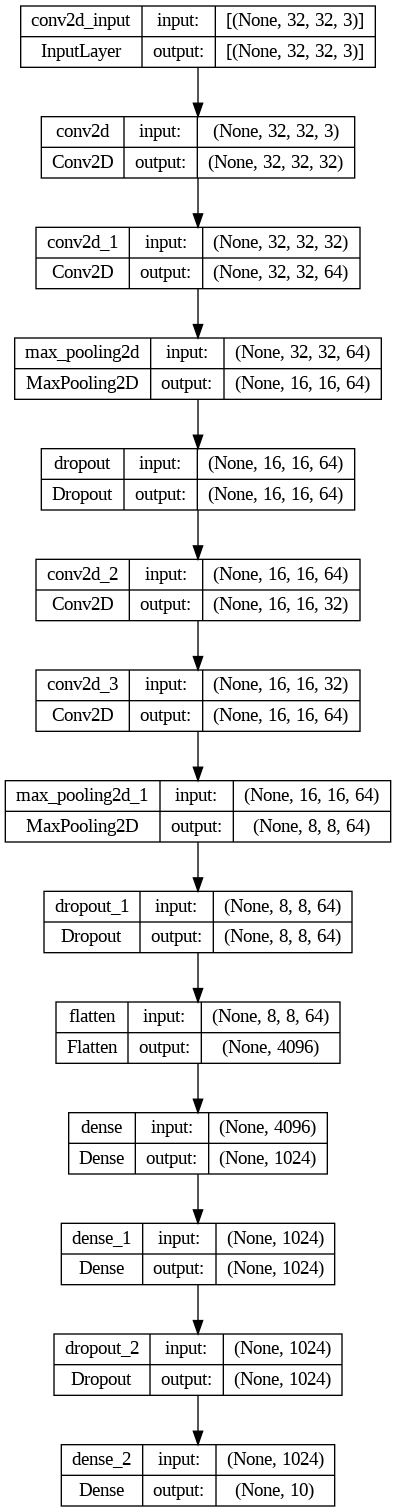

In [35]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

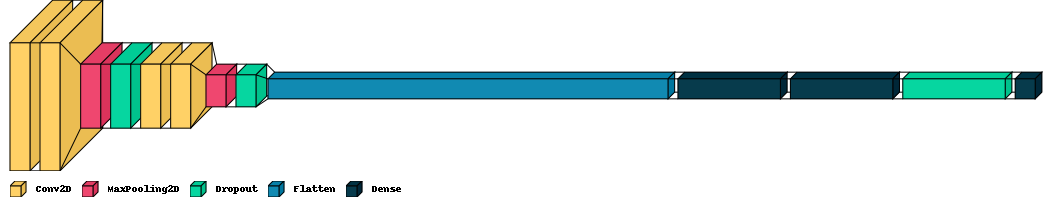

In [36]:
visualkeras.layered_view(model, legend=True)

### Build CNN Model 3 With Batch Normalization

In [ ]:
def build_cnn_model_3(n_classes,
                hidden_layer_sizes=[],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 128, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())  
  model.add(keras.layers.Conv2D(filters = 256, kernel_size=(5,5), strides = (1,1), input_shape = (32,32,3), activation=activation, padding='same'))
  model.add(BatchNormalization())
  model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
  model.add(tf.keras.layers.Dropout(rate=0.4)) # adjust dropout layer

  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  
  model.add(tf.keras.layers.Dropout(rate=0.5)) # add dropout layer

  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_cnn_model_3(len(label_names), learning_rate=0.01, hidden_layer_sizes=[1024, 1024])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=20, #can we train a bit longer
  batch_size=64,
  validation_split=0.1,
  verbose=1)

display(pd.DataFrame(history.history))
print(model.summary())

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=12)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(x_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

In [ ]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
visualkeras.layered_view(model, legend=True)

### Evaluate CNN Model Precision and Accuracy Metrics by Label

In [37]:
# Get labels by taking the argmax -- the index with the largest probability.
test_predictions = np.argmax(model.predict(x_test), axis=-1)
print(test_predictions)

313/313 [==============================] - 1s 2ms/step
[5 8 8 ... 5 1 7]


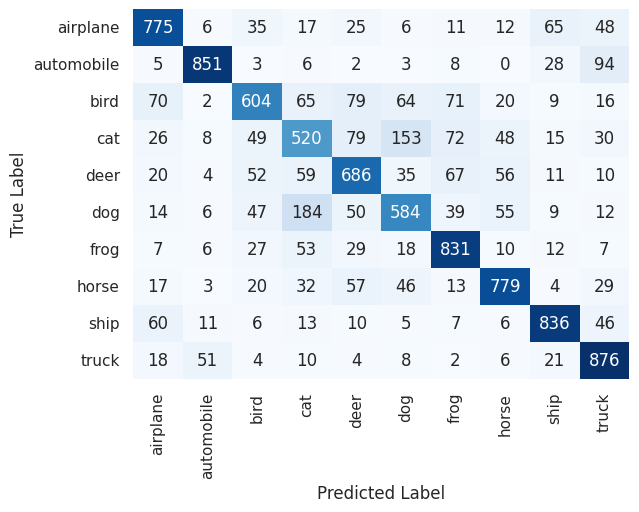

In [38]:
# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=label_names, yticklabels=label_names, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [39]:
# Calculate Precision: TP / (TP+FP) ~ divide the true positives for each label by the sum down the columns (axis=0) 
for i in range(10):
    print(label_names[i], "\t", confusion_matrix[(i,i)]/tf.reduce_sum(confusion_matrix,0)[i])

airplane 	 tf.Tensor(0.7658102766798419, shape=(), dtype=float64)
automobile 	 tf.Tensor(0.8976793248945147, shape=(), dtype=float64)
bird 	 tf.Tensor(0.7131050767414404, shape=(), dtype=float64)
cat 	 tf.Tensor(0.5422314911366006, shape=(), dtype=float64)
deer 	 tf.Tensor(0.6718903036238981, shape=(), dtype=float64)
dog 	 tf.Tensor(0.6334056399132321, shape=(), dtype=float64)
frog 	 tf.Tensor(0.7413024085637824, shape=(), dtype=float64)
horse 	 tf.Tensor(0.7852822580645161, shape=(), dtype=float64)
ship 	 tf.Tensor(0.8277227722772277, shape=(), dtype=float64)
truck 	 tf.Tensor(0.75, shape=(), dtype=float64)


label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 



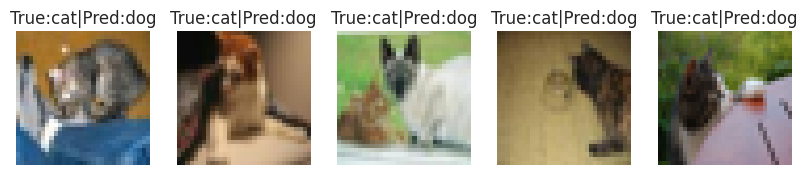

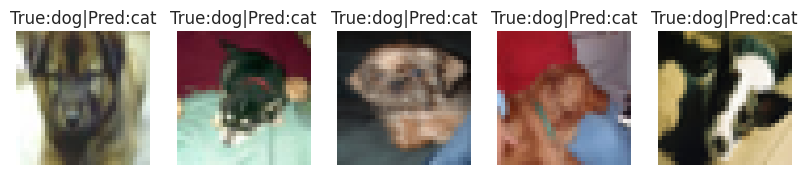

In [51]:
print("label names:", label_names,"\n")
x_test_1 = x_test[np.logical_and(y_test==3, test_predictions==5)] #true label = 'cat', predicted label = 'dog'
x_test_2 = x_test[np.logical_and(y_test==5, test_predictions==3)] #true label = 'dog', predicted label = 'cat'

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_1[i], cmap='gray')
  axs[i].set_title("True:" + label_names[3] + "|Pred:" + label_names[5])
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
for i in range(5):
  axs[i].imshow(x_test_2[i], cmap='gray')
  axs[i].set_title("True:" + label_names[5] + "|Pred:" + label_names[3])
  axs[i].axis('off')
plt.show()

### Visualize CNN Model Learning At Each Layer

Shape of image: (1, 32, 32, 3)


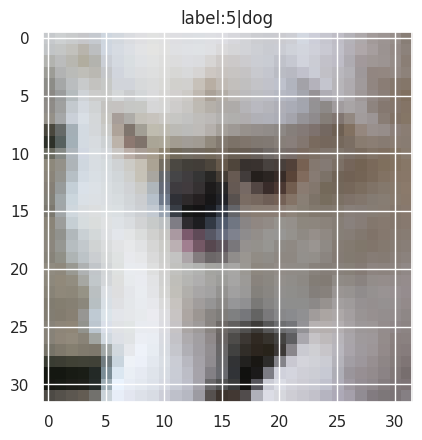

In [57]:
#Pick an example from our training data to view how our model learns the image by layer
img_tensor = np.expand_dims(x_train[2], axis = 0)

# Print image tensor shape
print('Shape of image:', img_tensor.shape);
  
# Print image
plt.imshow(img_tensor[0]);
plt.title('label:' + str(y_train[1])+"|"+label_names[y_train[1]])
plt.show()

1/1 [==============================] - 0s 118ms/step
----------------
Geeting activations of layer 1 : conv2d
Images size is 32 x 32
Number of channels is 32
Printing channels:


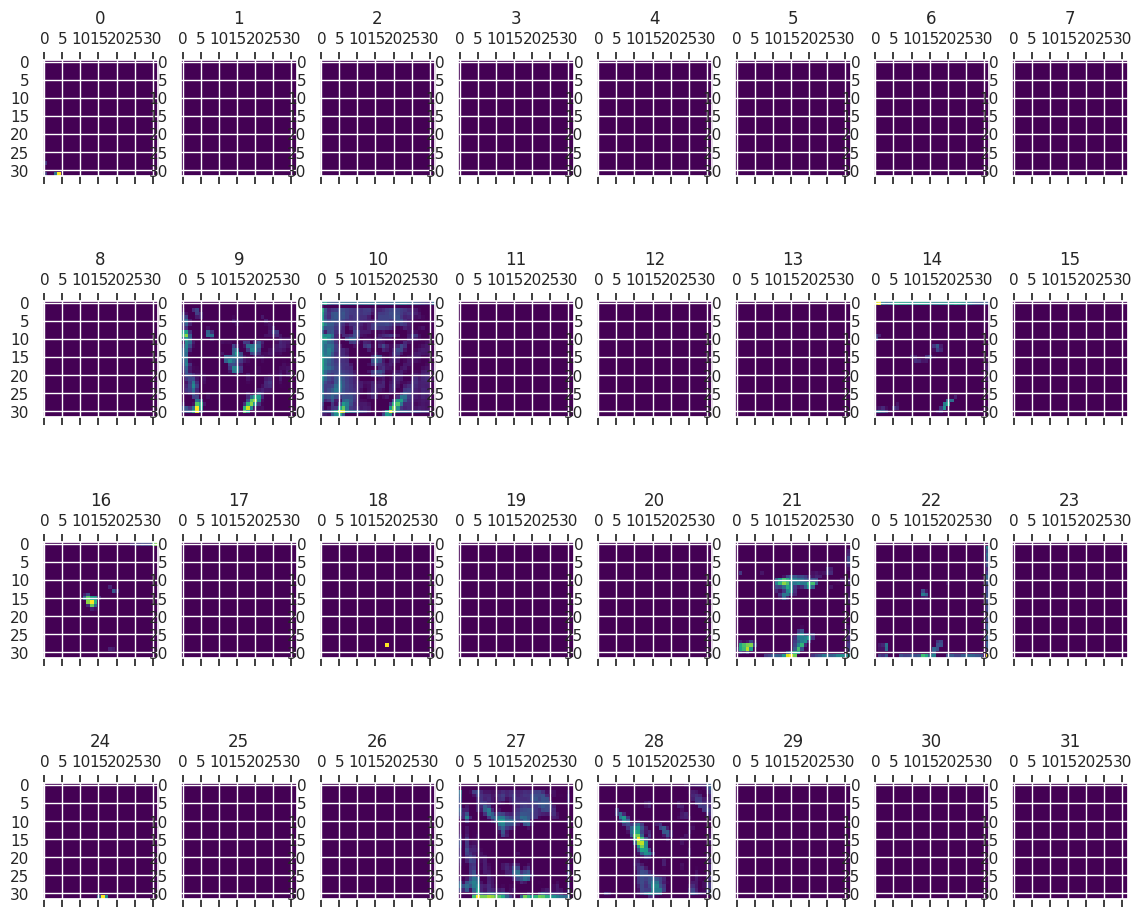

----------------
Geeting activations of layer 2 : conv2d_1
Images size is 32 x 32
Number of channels is 64
Printing channels:


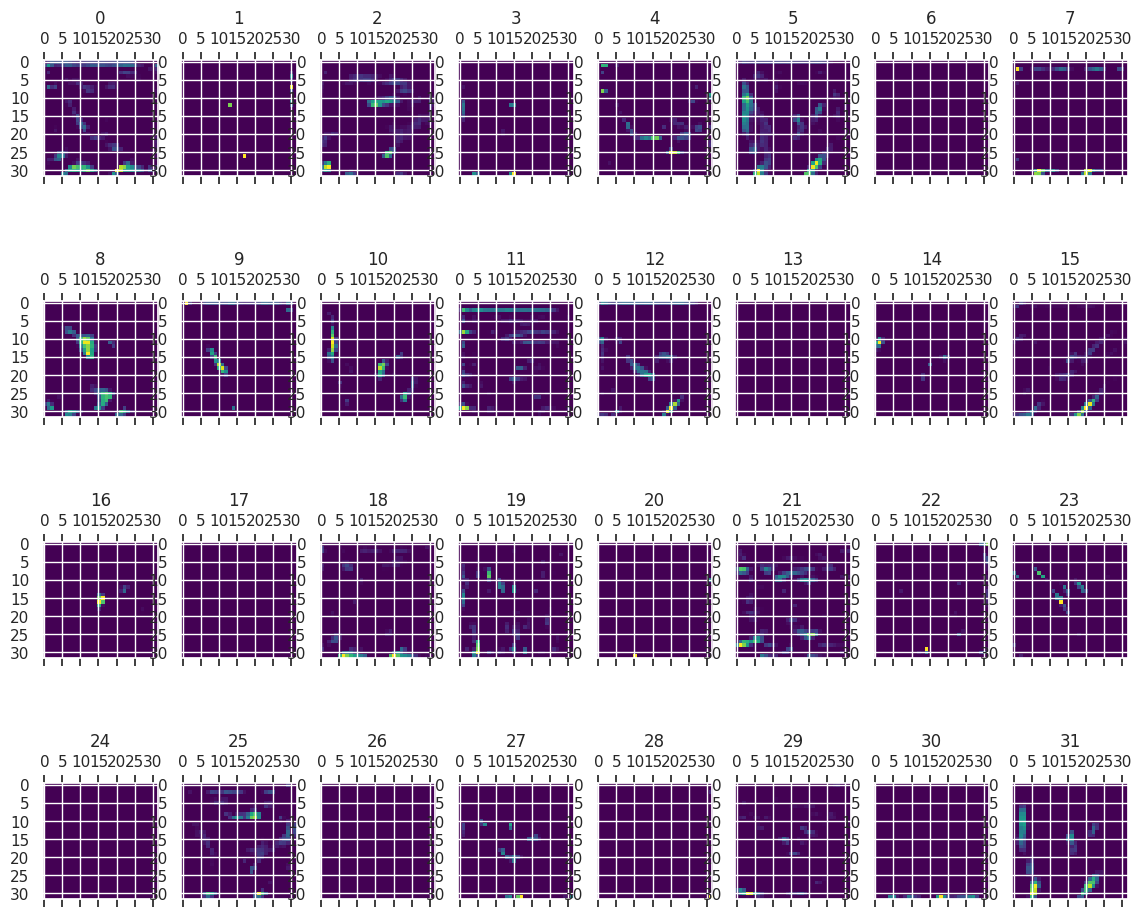

----------------
Geeting activations of layer 3 : max_pooling2d
Images size is 16 x 16
Number of channels is 64
Printing channels:


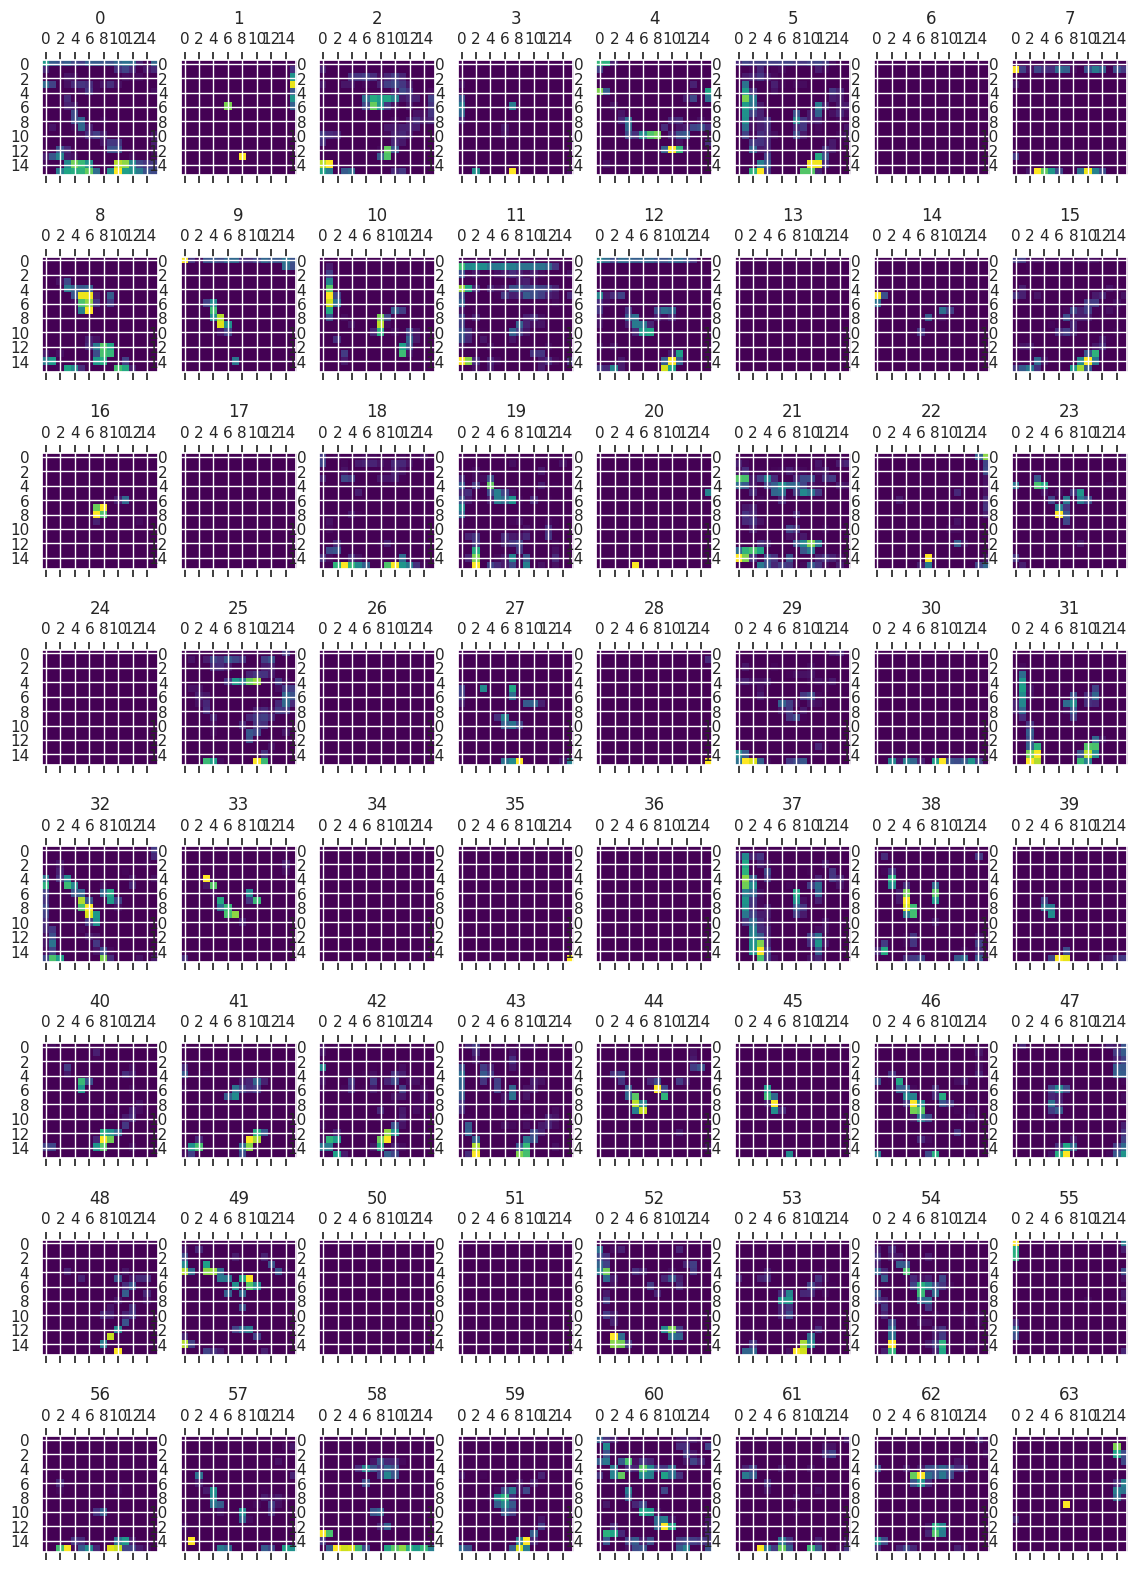

----------------
Geeting activations of layer 4 : dropout
Images size is 16 x 16
Number of channels is 64
Printing channels:


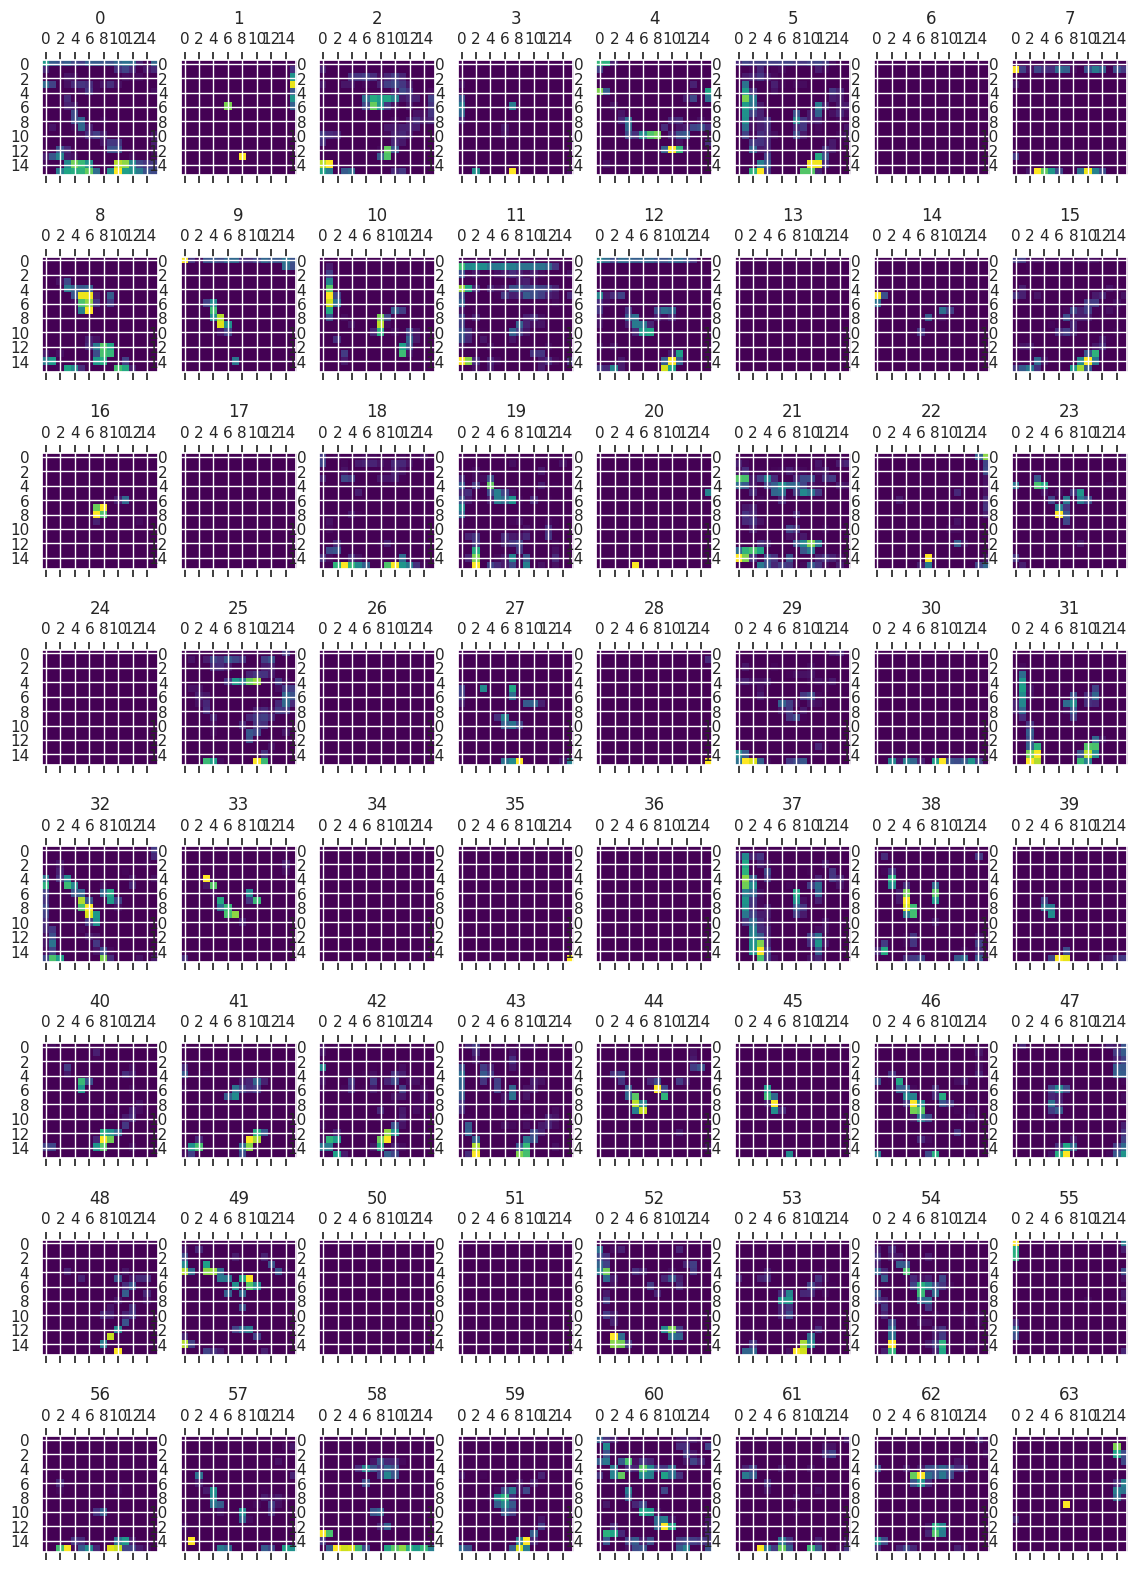

In [58]:
# outputs of the first 4 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# grab layer names
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

# getting activations of each layer
for idx, layer in enumerate(activations):
    if idx in (0,1,2,3):
        print('----------------')
        print('Geeting activations of layer',  idx+1, ':', layer_names[idx])
        activation = layer

        # shape of layer activation
        print('Images size is', activation.shape[1], 'x', activation.shape[2])
        print('Number of channels is', activation.shape[3])

        # print channels
        print('Printing channels:')
        
        # define nrows and ncols depending on number of channels
        if idx in (0,1):
            nrows, ncols = 4,8
        if idx in (2,3):
            nrows, ncols = 8,8

        # plots
        channel=0
        if idx in (0,1):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
        if idx in (2,3):
            f, axs = plt.subplots(nrows, ncols, figsize=(14,20))
            
        for i in range(nrows):
            for j in range(ncols):
                if i==0 and j==0:
                    channel=0
                else:
                    channel+=1

                axs[i,j].matshow(activation[0,:, :, channel], cmap ='viridis')
                axs[i,j].set(title=str(channel))
                #axs[i,j].axis('off') # pay attention to the range of x and y axis
        plt.show()